In [200]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.stats.anova import anova_lm

# Lab-Practice

In [214]:
VIF = pd.DataFrame()
VIF['features'] = x2.columns
VIF['VIF'] = [vif(x2.values,i) for i in range(x2.shape[1])]

In [215]:
VIF

,features,VIF
0,const,535.526619
1,crim,1.767486
2,zn,2.298459
3,indus,3.987181
4,chas,1.071168
5,nox,4.369093
6,rm,1.912532
7,age,3.088232
8,dis,3.954037
9,rad,7.445301


# (8)-A

In [216]:
df = pd.read_csv('Auto.csv')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [217]:
x = sm.add_constant(df['horsepower'])
y = df['mpg']

model = sm.OLS(y,x)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Tue, 09 Sep 2025   Prob (F-statistic):           7.03e-81
Time:                        06:20:48   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [218]:
x = pd.DataFrame({'horsepower':[98]})

In [219]:
newx = sm.add_constant(x,has_constant='add')

In [220]:
pred = results.get_prediction(newx)
print(f'predicted mean for 98 horsepower is {pred.predicted_mean}')
print(f'95% confidence interval for 98 horsepower is {pred.conf_int(alpha=0.05)}')
print(f'95% prediction interval for 98 horsepower is {pred.conf_int(obs=True,alpha=0.05)}')

predicted mean for 98 horsepower is [24.46707715]
95% confidence interval for 98 horsepower is [[23.97307896 24.96107534]]
95% prediction interval for 98 horsepower is [[14.80939607 34.12475823]]


# (B)

<Axes: xlabel='horsepower', ylabel='mpg'>

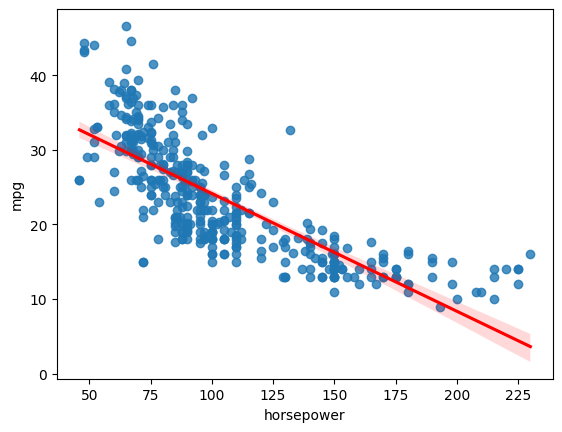

In [221]:
plt.Figure(figsize=(6,4))
sns.regplot(x=df['horsepower'],y=df['mpg'],line_kws={'color':'red'})

# (C)

Text(0.5, 1.0, 'Residuals vs Fitted values')

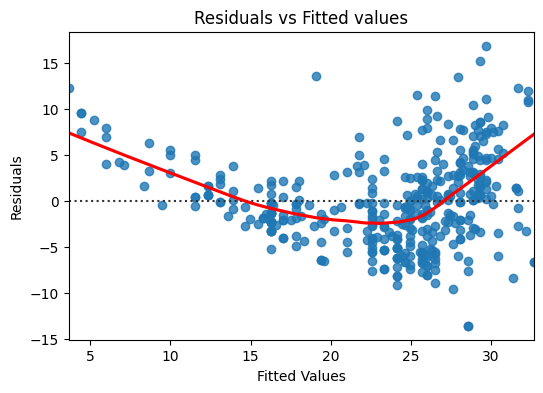

In [222]:
plt.figure(figsize=(6,4))
sns.residplot(x=results.fittedvalues,y=results.resid,lowess=True,line_kws={'color':'red'})
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted values')


# (9)-A

In [223]:
df = pd.read_csv('Auto.csv')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


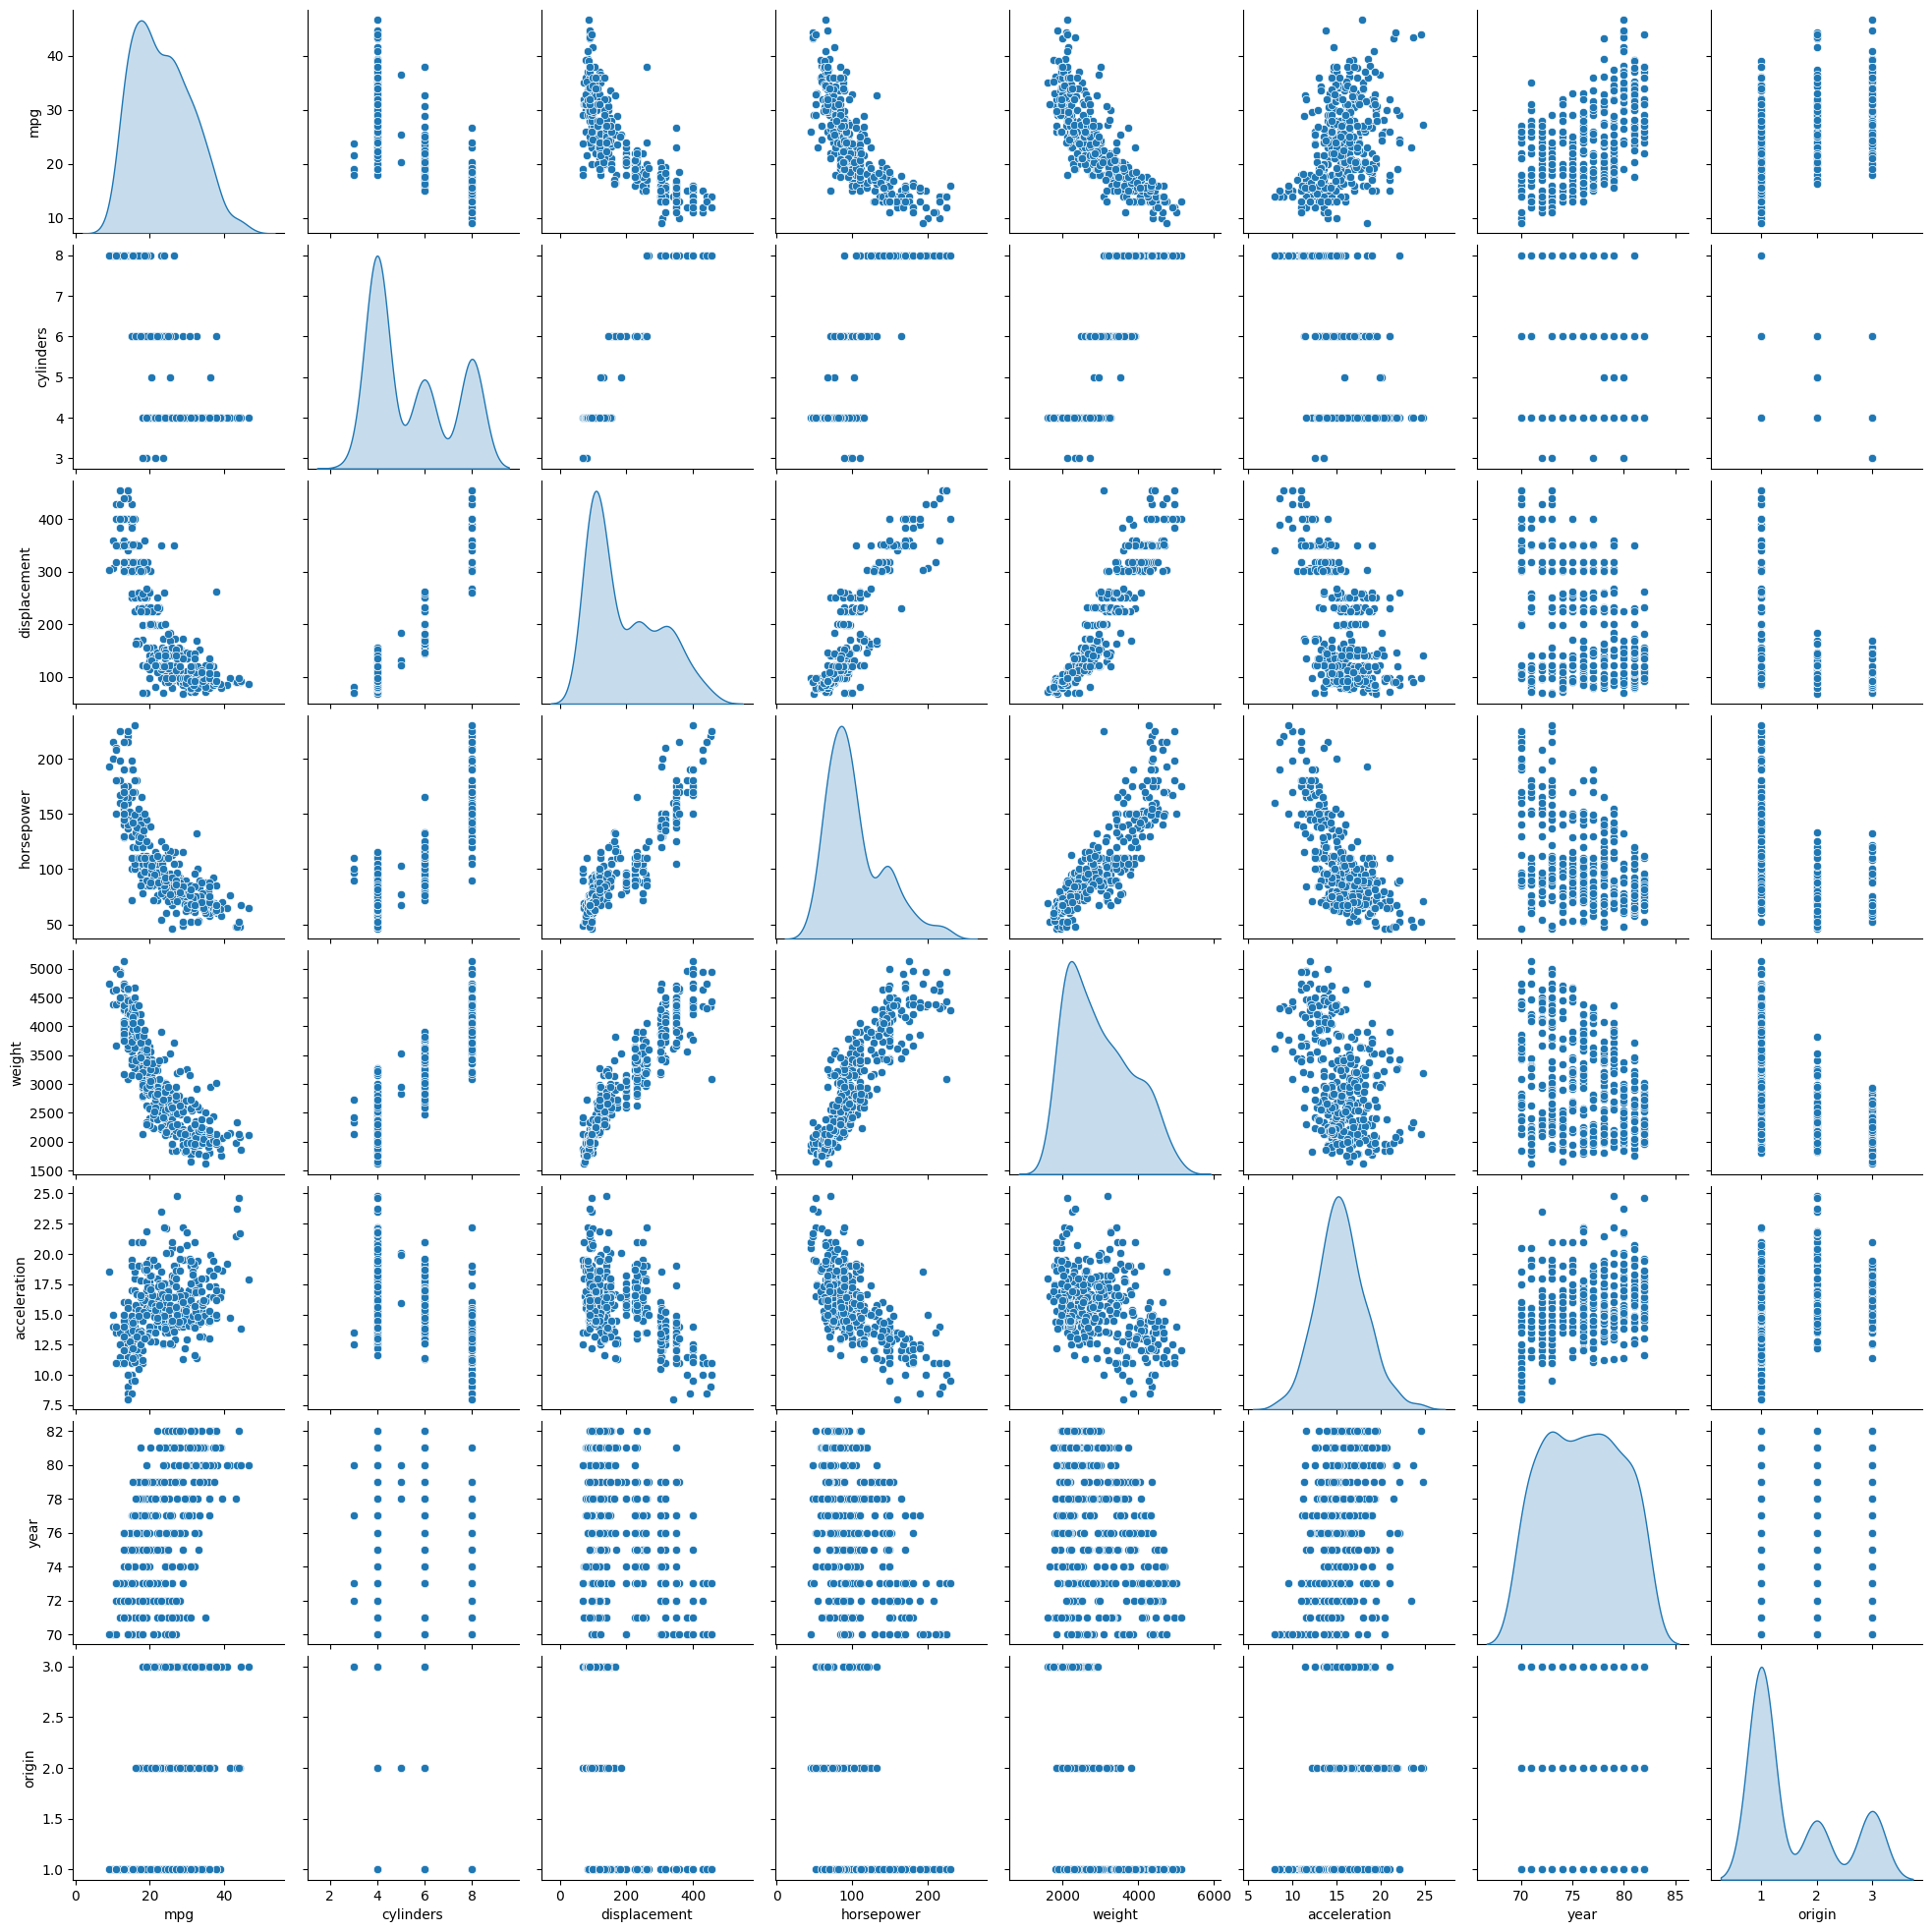

In [224]:
sns.pairplot(df,diag_kind='kde')

# (B)

In [225]:
df = df.drop('name',axis=1)
df.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


# (C)

In [226]:
x = df.drop('mpg',axis=1)
x = sm.add_constant(x)
y= df['mpg']

model = sm.OLS(y,x)
result = model.fit()
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Tue, 09 Sep 2025   Prob (F-statistic):          2.04e-139
Time:                        06:20:53   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.2184      4.644     -3.707      0.000     -26.350      -8.087
cylinders       -0.4934      0.323     -1.526      0.128      -1.129       0.142
displacement     0.0199      0.008      2.647      0.008       0.005       0.035
horsepower      -0.0170      0.014     -1.230      0.220      -0.044       0.010
weight          -0.0065      0.001     -9.929      0.000      -0.008      -0.005
acceleration     0.0806      0.099      0.815      0.415      -0.114       0.275
year             0.7508      0.051     14.729      0.000       0.651       0.851
origin           1.4261      0.278      5.127      0.000       0.879       1.973
==============================================================================
Omnibus:                       31.906   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.100
Skew:                           0.529   Prob(JB):                     2.95e-12
Kurtosis:                       4.460   Cond. No.                     8.59e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# (D)

Text(0.5, 1.0, 'Residuals vs Fitted values')

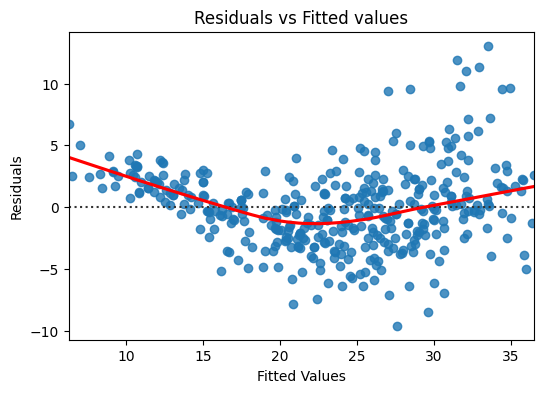

In [227]:
plt.figure(figsize=(6,4))
sns.residplot(x=result.fittedvalues,y=result.resid,lowess=True,line_kws={'color':'red'})
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted values')

# (E)

In [228]:
df['dis_horse'] = df['horsepower']*df['displacement']
df['horse_accel'] = df['horsepower']*df['acceleration']
df['dis_accel'] = df['displacement']*df['acceleration']
df['dis_weight'] = df['displacement']*df['weight']
df['weight_horse'] = df['weight']*df['horsepower']
df['weight_accel'] = df['weight']*df['acceleration']

In [229]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,dis_horse,horse_accel,dis_accel,dis_weight,weight_horse,weight_accel
0,18.0,8,307.0,130,3504,12.0,70,1,39910.0,1560.0,3684.0,1075728.0,455520,42048.0
1,15.0,8,350.0,165,3693,11.5,70,1,57750.0,1897.5,4025.0,1292550.0,609345,42469.5
2,18.0,8,318.0,150,3436,11.0,70,1,47700.0,1650.0,3498.0,1092648.0,515400,37796.0
3,16.0,8,304.0,150,3433,12.0,70,1,45600.0,1800.0,3648.0,1043632.0,514950,41196.0
4,17.0,8,302.0,140,3449,10.5,70,1,42280.0,1470.0,3171.0,1041598.0,482860,36214.5


In [230]:
x_with_interaction = df.drop('mpg',axis=1)
x_with_interaction = sm.add_constant(x_with_interaction)
y = df['mpg']

model = sm.OLS(y,x_with_interaction)
results_int = model.fit()
results_int.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     194.3
Date:                Tue, 09 Sep 2025   Prob (F-statistic):          2.64e-158
Time:                        06:20:53   Log-Likelihood:                -961.58
No. Observations:                 392   AIC:                             1951.
Df Residuals:                     378   BIC:                             2007.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            8.6834      8.501      1.021      0.308      -8.031      25.398
cylinders        0.3525      0.317      1.113      0.266      -0.270       0.975
displacement     0.0282      0.045      0.629      0.529      -0.060       0.116
horsepower      -0.0740      0.076     -0.970      0.333      -0.224       0.076
weight          -0.0206      0.005     -4.020      0.000      -0.031      -0.011
acceleration    -0.5006      0.364     -1.376      0.170      -1.216       0.215
year             0.7754      0.045     17.187      0.000       0.687       0.864
origin           0.5677      0.263      2.162      0.031       0.051       1.084
dis_horse       -0.0001      0.000     -0.785      0.433      -0.000       0.000
horse_accel     -0.0068      0.004     -1.924      0.055      -0.014       0.000
dis_accel       -0.0039      0.002     -2.085      0.038      -0.008      -0.000
dis_weight    1.201e-05   5.81e-06      2.066      0.039    5.81e-07    2.34e-05
weight_horse  4.324e-05   1.77e-05      2.445      0.015    8.47e-06     7.8e-05
weight_accel     0.0006      0.000      2.678      0.008       0.000       0.001
==============================================================================
Omnibus:                       39.383   Durbin-Watson:                   1.577
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               83.795
Skew:                           0.548   Prob(JB):                     6.37e-19
Kurtosis:                       4.982   Cond. No.                     5.49e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.49e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<Axes: >

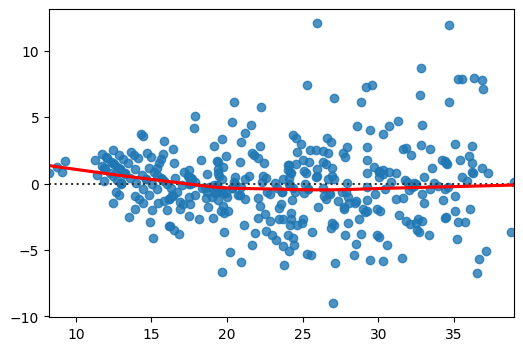

In [231]:
plt.figure(figsize=(6,4))
sns.residplot(x=results_int.fittedvalues,y=results_int.resid,lowess=True,line_kws={'color':'red'})


# (F)

In [232]:
x_log =np.log(df.drop('mpg',axis=1))
x_log = sm.add_constant(x_log)
y = df['mpg']

model = sm.OLS(y,x_log)
resultslog = model.fit()
resultslog.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     306.5
Date:                Tue, 09 Sep 2025   Prob (F-statistic):          6.67e-153
Time:                        06:20:53   Log-Likelihood:                -991.70
No. Observations:                 392   AIC:                             1999.
Df Residuals:                     384   BIC:                             2031.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -66.5643     17.505     -3.803      0.000    -100.982     -32.146
cylinders        1.4818      1.659      0.893      0.372      -1.780       4.743
displacement     0.8662      0.492      1.761      0.079      -0.101       1.833
horsepower      -1.1040      0.460     -2.399      0.017      -2.009      -0.199
weight          -2.9730      0.776     -3.833      0.000      -4.498      -1.448
acceleration    -0.4431      0.454     -0.975      0.330      -1.336       0.450
year            54.9857      3.555     15.465      0.000      47.995      61.976
origin           1.5822      0.508      3.113      0.002       0.583       2.582
dis_horse       -0.2377      0.613     -0.388      0.699      -1.444       0.968
horse_accel     -1.5471      0.831     -1.861      0.063      -3.181       0.087
dis_accel        0.4231      0.691      0.612      0.541      -0.936       1.783
dis_weight      -2.1068      0.662     -3.183      0.002      -3.408      -0.805
weight_horse    -4.0769      0.578     -7.049      0.000      -5.214      -2.940
weight_accel    -3.4161      0.550     -6.212      0.000      -4.497      -2.335
==============================================================================
Omnibus:                       40.670   Durbin-Watson:                   1.394
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               81.138
Skew:                           0.587   Prob(JB):                     2.40e-18
Kurtosis:                       4.894   Cond. No.                     9.45e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.49e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

<Axes: >

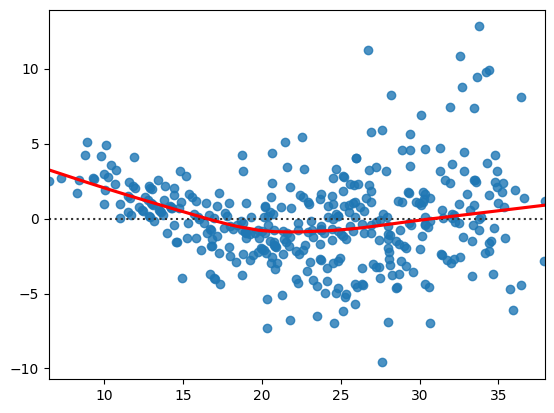

In [233]:
plt.Figure(figsize=(6,4))
sns.residplot(x=resultslog.fittedvalues,y=resultslog.resid,lowess=True,line_kws={'color':'red'})

In [234]:
x_sqrt = np.sqrt(df.drop('mpg',axis=1))
x_sqrt = sm.add_constant(x_sqrt)
y = df['mpg']

model = sm.OLS(y,x_sqrt)
resultsqrt = model.fit()
resultsqrt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     192.4
Date:                Tue, 09 Sep 2025   Prob (F-statistic):          1.29e-157
Time:                        06:20:53   Log-Likelihood:                -963.23
No. Observations:                 392   AIC:                             1954.
Df Residuals:                     378   BIC:                             2010.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           27.0493     33.305      0.812      0.417     -38.437      92.535
cylinders        0.0804      1.445      0.056      0.956      -2.760       2.921
displacement     2.3113      2.695      0.858      0.392      -2.988       7.611
horsepower      -2.1998      2.989     -0.736      0.462      -8.077       3.677
weight          -3.3443      1.221     -2.739      0.006      -5.745      -0.944
acceleration    -7.5620      6.044     -1.251      0.212     -19.446       4.322
year            13.5186      0.798     16.943      0.000      11.950      15.087
origin           1.5702      0.733      2.142      0.033       0.129       3.012
dis_horse       -0.0417      0.123     -0.340      0.734      -0.283       0.200
horse_accel     -0.6636      0.551     -1.204      0.229      -1.747       0.420
dis_accel       -0.9126      0.459     -1.988      0.048      -1.815      -0.010
dis_weight       0.0275      0.019      1.471      0.142      -0.009       0.064
weight_horse     0.0721      0.048      1.510      0.132      -0.022       0.166
weight_accel     0.4575      0.204      2.248      0.025       0.057       0.858
==============================================================================
Omnibus:                       39.806   Durbin-Watson:                   1.583
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               84.383
Skew:                           0.555   Prob(JB):                     4.75e-19
Kurtosis:                       4.984   Cond. No.                     2.41e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.41e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<Axes: >

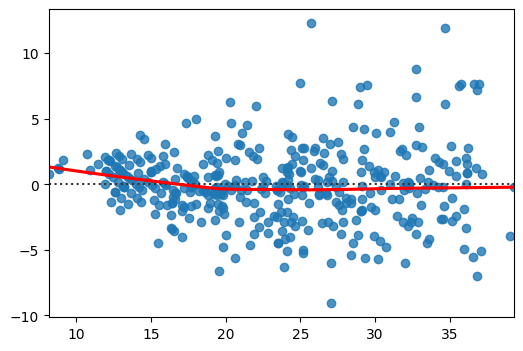

In [235]:
plt.figure(figsize=(6,4))
sns.residplot(x=resultsqrt.fittedvalues,y=resultsqrt.resid,lowess=True,line_kws={'color':'red'})

In [236]:
x_2 = np.power(df.drop('mpg',axis=1),2)
x_2 = sm.add_constant(x_2)
y = df['mpg']

model = sm.OLS(y,x_2)
resultssq = model.fit()
resultssq.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     176.6
Date:                Tue, 09 Sep 2025   Prob (F-statistic):          1.50e-151
Time:                        06:20:54   Log-Likelihood:                -977.79
No. Observations:                 392   AIC:                             1984.
Df Residuals:                     378   BIC:                             2039.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            8.6667      2.631      3.294      0.001       3.493      13.840
cylinders        0.0807      0.030      2.658      0.008       0.021       0.140
displacement -8.381e-06   4.69e-05     -0.179      0.858      -0.000    8.38e-05
horsepower      -0.0003      0.000     -1.683      0.093      -0.001    5.32e-05
weight       -2.151e-06   3.58e-07     -6.003      0.000   -2.86e-06   -1.45e-06
acceleration    -0.0014      0.005     -0.265      0.791      -0.012       0.009
year             0.0051      0.000     16.688      0.000       0.004       0.006
origin           0.1909      0.064      2.987      0.003       0.065       0.317
dis_horse    -9.345e-10      9e-10     -1.038      0.300    -2.7e-09    8.35e-10
horse_accel   -1.13e-06   5.46e-07     -2.069      0.039    -2.2e-06   -5.61e-08
dis_accel    -2.381e-07    1.2e-07     -1.992      0.047   -4.73e-07   -3.08e-09
dis_weight    5.104e-12   1.89e-12      2.699      0.007    1.39e-12    8.82e-12
weight_horse  3.085e-11   8.76e-12      3.521      0.000    1.36e-11    4.81e-11
weight_accel  2.332e-09   9.85e-10      2.367      0.018    3.95e-10    4.27e-09
==============================================================================
Omnibus:                       30.997   Durbin-Watson:                   1.525
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               58.225
Skew:                           0.474   Prob(JB):                     2.27e-13
Kurtosis:                       4.633   Cond. No.                     2.18e+13
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.18e+13. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0, 0.5, 'Residuals')

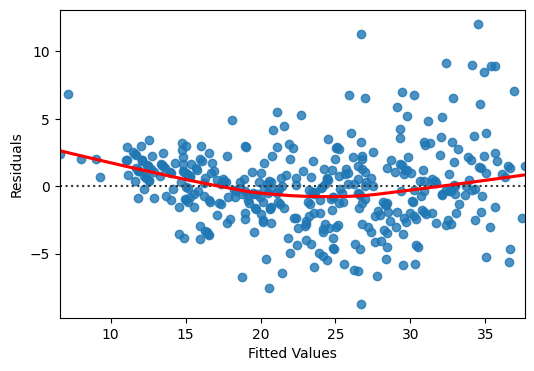

In [237]:
plt.figure(figsize=(6,4))
sns.residplot(x=resultssq.fittedvalues,y=resultssq.resid,lowess=True,line_kws={'color':'red'})
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')

# (11)-A

In [238]:
rng = np.random.default_rng(1)
x = rng.normal(size=100)
y = 2 * x + rng.normal(size=100)

In [239]:
model = sm.OLS(y,x)
results = model.fit()
print(f'Coefficient: {results.params}')
print(f'Standard Errors: {results.bse}')
print(f'p-values: {results.pvalues}')
print(f't-values: {results.tvalues}')

Coefficient: [1.97624238]
Standard Errors: [0.11694837]
p-values: [6.23154601e-31]
t-values: [16.89841706]


# (B)

In [240]:
model2 = sm.OLS(x,y)
results2 = model.fit()
print(f'Coefficient: {results2.params}')
print(f'Standard Errors: {results2.bse}')
print(f'p-values: {results2.pvalues}')
print(f't-values: {results2.tvalues}')

Coefficient: [1.97624238]
Standard Errors: [0.11694837]
p-values: [6.23154601e-31]
t-values: [16.89841706]


# (F)

In [241]:
x_with_constant = sm.add_constant(x)
model2 = sm.OLS(y,x_with_constant)
result2 = model2.fit()

print(f'Coefficient: {result2.params}')
print(f'Standard Errors: {result2.bse}')
print(f'p-values: {result2.pvalues}')
print(f't-values: {result2.tvalues}')



Coefficient: [-0.07602555  1.96858203]
Standard Errors: [0.1005501  0.11763927]
p-values: [4.51405182e-01 1.73877127e-30]
t-values: [-0.75609623 16.7340552 ]


In [242]:
y_with_constant = sm.add_constant(y)
model2 = sm.OLS(x,y_with_constant)
result2 = model2.fit()

print(f'Coefficient: {result2.params}')
print(f'Standard Errors: {result2.bse}')
print(f'p-values: {result2.pvalues}')
print(f't-values: {result2.tvalues}')

Coefficient: [0.00952458 0.37629133]
Standard Errors: [0.04407857 0.02248656]
p-values: [8.29373099e-01 1.73877127e-30]
t-values: [ 0.21608182 16.7340552 ]


# (14)-A

In [313]:
rng = np.random.default_rng (10)
x1 = rng.uniform(0, 1, size=100)
x2 = 0.5 * x1 + rng.normal(size=100) / 10
y = 2 + 2 * x1 + 0.3 * x2 + rng.normal(size=100)

In [345]:
df = pd.DataFrame({'x1':x1,'x2':x2,'y':y})
x = sm.add_constant(df[['x1','x2']])
y = df['y']

In [347]:
print(f'The correlation between x1 and x2 is {round(x.corr()["x1"][2],2)}')

The correlation between x1 and x2 is 0.77


C:\Users\User\AppData\Local\Temp\ipykernel_11284\2849961196.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'The correlation between x1 and x2 is {round(x.corr()["x1"][2],2)}')


<Axes: xlabel='x1', ylabel='x2'>

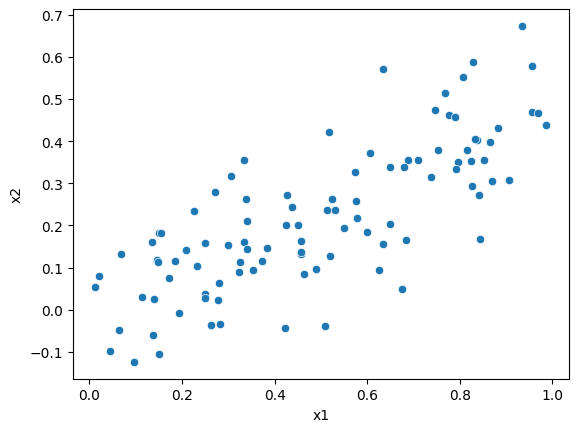

In [348]:
sns.scatterplot(x=x['x1'],y=x['x2'])

# (C)

In [349]:
model = sm.OLS(y,x)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     19.89
Date:                Tue, 09 Sep 2025   Prob (F-statistic):           5.76e-08
Time:                        07:38:31   Log-Likelihood:                -130.62
No. Observations:                 100   AIC:                             267.2
Df Residuals:                      97   BIC:                             275.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9579      0.190     10.319      0.000       1.581       2.334
x1             1.6154      0.527      3.065      0.003       0.569       2.661
x2             0.9428      0.831      1.134      0.259      -0.707       2.592
==============================================================================
Omnibus:                        0.051   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.975   Jarque-Bera (JB):                0.041
Skew:                          -0.036   Prob(JB):                        0.979
Kurtosis:                       2.931   Cond. No.                         11.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Variable x2 is not statistically significant**

In [354]:
for features in x.columns:
    model = sm.OLS(y,x[features])
    results = model.fit()
    print(f'Coefficient: {results.params}')
    print(f'Standard Errors: {results.bse}')
    print(f'p-values: {results.pvalues}')
    print(f't-values: {results.tvalues}')
    print(100*'-')

Coefficient: const    2.964849
dtype: float64
Standard Errors: const    0.106622
dtype: float64
p-values: const    1.416541e-48
dtype: float64
t-values: const    27.807098
dtype: float64
----------------------------------------------------------------------------------------------------
Coefficient: x1    5.088681
dtype: float64
Standard Errors: x1    0.230522
dtype: float64
p-values: x1    5.066927e-40
dtype: float64
t-values: x1    22.074614
dtype: float64
----------------------------------------------------------------------------------------------------
Coefficient: x2    9.469744
dtype: float64
Standard Errors: x2    0.614695
dtype: float64
p-values: x2    4.851193e-28
dtype: float64
t-values: x2    15.405596
dtype: float64
----------------------------------------------------------------------------------------------------


When we are fitting the model with individual predictors , x2 becomes statistically significant

In [357]:
x1 = np.concatenate([x1, [0.1]])
x2 = np.concatenate([x2, [0.8]])

In [362]:
y = np.concatenate([y,[6]])

In [366]:
df2 = pd.DataFrame({'x1':x1,'x2':x2,'y':y})
x = sm.add_constant(df[['x1','x2']])
y = df['y']

In [368]:
model = sm.OLS(y,x)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     19.89
Date:                Tue, 09 Sep 2025   Prob (F-statistic):           5.76e-08
Time:                        07:50:32   Log-Likelihood:                -130.62
No. Observations:                 100   AIC:                             267.2
Df Residuals:                      97   BIC:                             275.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9579      0.190     10.319      0.000       1.581       2.334
x1             1.6154      0.527      3.065      0.003       0.569       2.661
x2             0.9428      0.831      1.134      0.259      -0.707       2.592
==============================================================================
Omnibus:                        0.051   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.975   Jarque-Bera (JB):                0.041
Skew:                          -0.036   Prob(JB):                        0.979
Kurtosis:                       2.931   Cond. No.                         11.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [369]:
for features in x.columns:
    model = sm.OLS(y,x[features])
    results = model.fit()
    print(f'Coefficient: {results.params}')
    print(f'Standard Errors: {results.bse}')
    print(f'p-values: {results.pvalues}')
    print(f't-values: {results.tvalues}')
    print(100*'-')

Coefficient: const    2.964849
dtype: float64
Standard Errors: const    0.106622
dtype: float64
p-values: const    1.416541e-48
dtype: float64
t-values: const    27.807098
dtype: float64
----------------------------------------------------------------------------------------------------
Coefficient: x1    5.088681
dtype: float64
Standard Errors: x1    0.230522
dtype: float64
p-values: x1    5.066927e-40
dtype: float64
t-values: x1    22.074614
dtype: float64
----------------------------------------------------------------------------------------------------
Coefficient: x2    9.469744
dtype: float64
Standard Errors: x2    0.614695
dtype: float64
p-values: x2    4.851193e-28
dtype: float64
t-values: x2    15.405596
dtype: float64
----------------------------------------------------------------------------------------------------


**After adding new points , my results remain the same**

# (15)-A

In [243]:
df = pd.read_csv('BostonHousing.csv')
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [244]:
x = sm.add_constant(df.drop('crim',axis=1))
predictors = list(sm.add_constant(df.drop('crim',axis=1)).columns)
y = df['crim']

In [245]:
univariate_coeff = []
for features in predictors:
  model = sm.OLS(y,x[features])
  result = model.fit()
  univariate_coeff.append(list(result.params))
  print(f'P values for {features}: {list(result.pvalues)}')
  print(f'T values for {features}: {list(result.tvalues)}')
  print('---------------------------------------------')

P values for const: [1.262592548812925e-19]
T values for const: [9.449953634404196]
---------------------------------------------
P values for zn: [0.9313887130061824]
T values for zn: [0.08614069856110028]
---------------------------------------------
P values for indus: [1.6513965473775084e-37]
T values for indus: [13.91904117280446]
---------------------------------------------
P values for chas: [0.24031160029752083]
T values for chas: [1.1755927194289053]
---------------------------------------------
P values for nox: [9.434291896875346e-28]
T values for nox: [11.6016823712068]
---------------------------------------------
P values for rm: [3.2197180498667143e-17]
T values for rm: [8.74926895123798]
---------------------------------------------
P values for age: [7.3912985844054125e-31]
T values for age: [12.36314105026721]
---------------------------------------------
P values for dis: [0.00012725150188183085]
T values for dis: [3.8616722407273594]
-------------------------------

Without **Zn** and **Chas** all the features are statistically significant

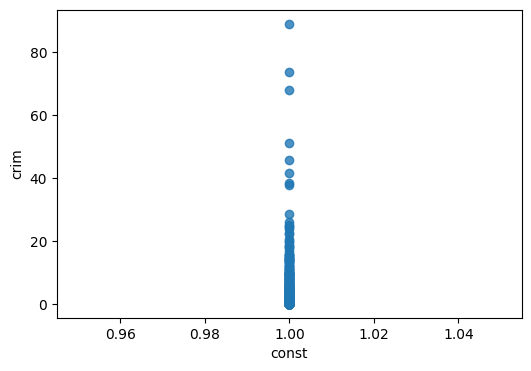

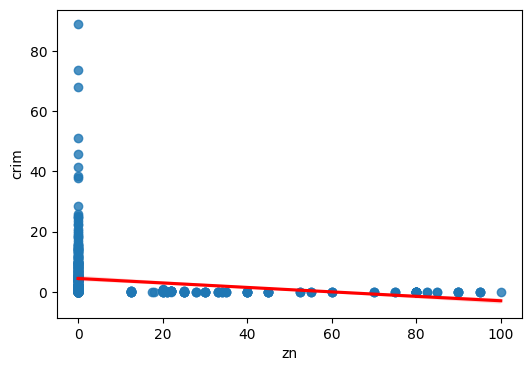

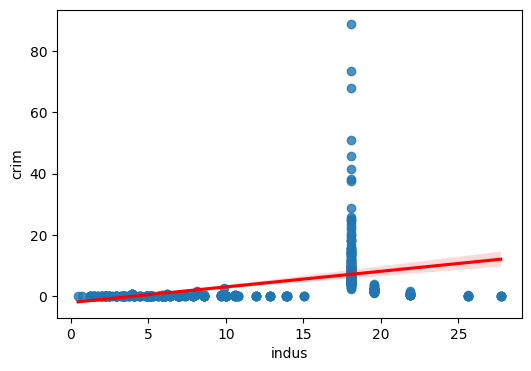

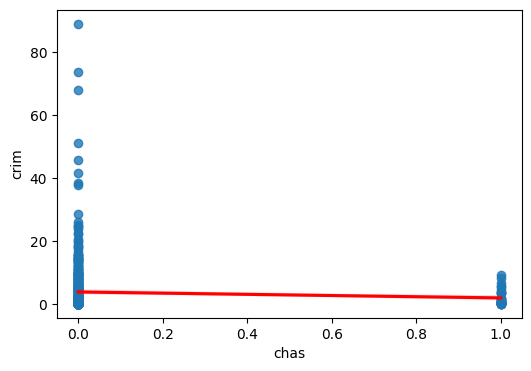

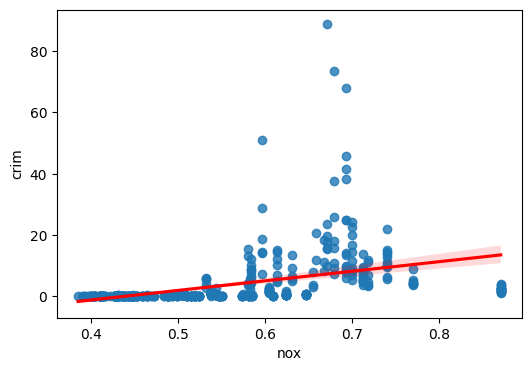

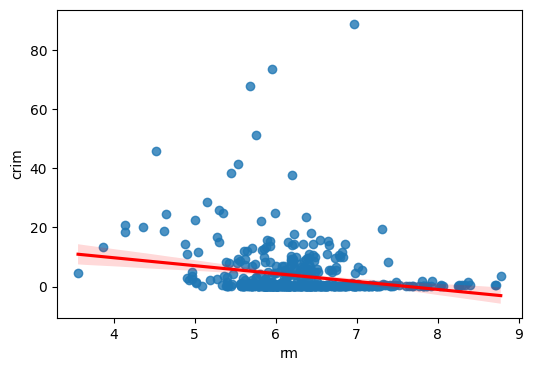

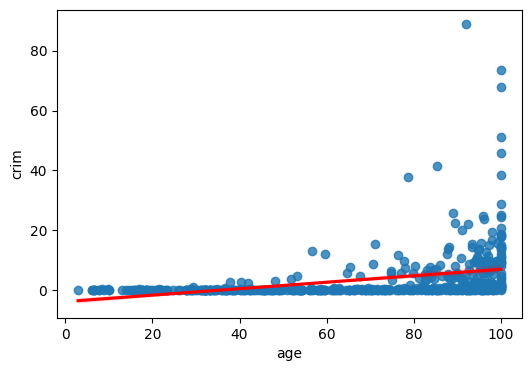

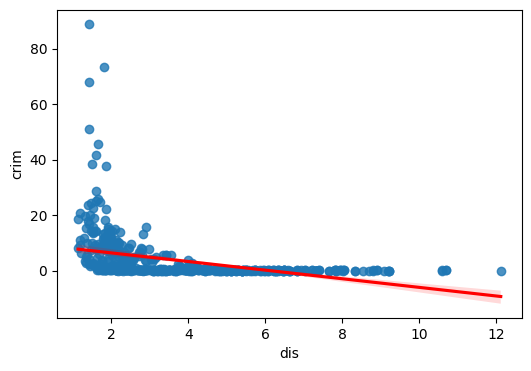

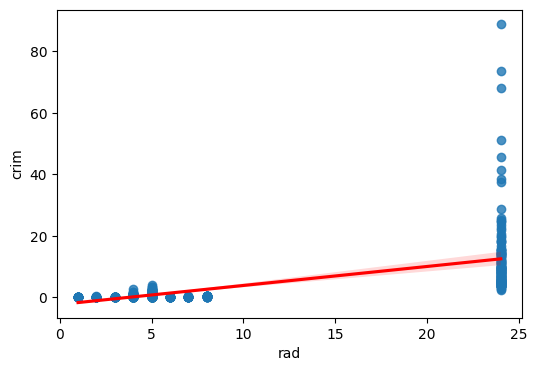

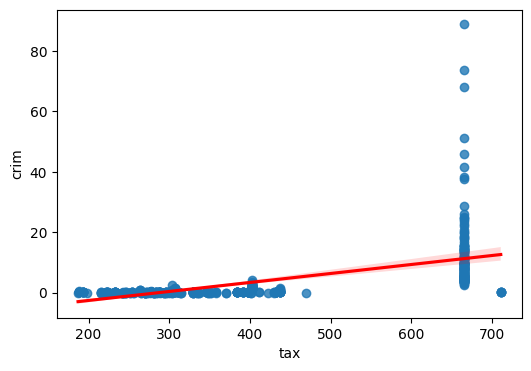

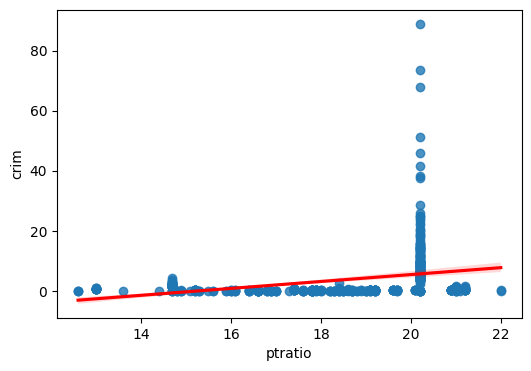

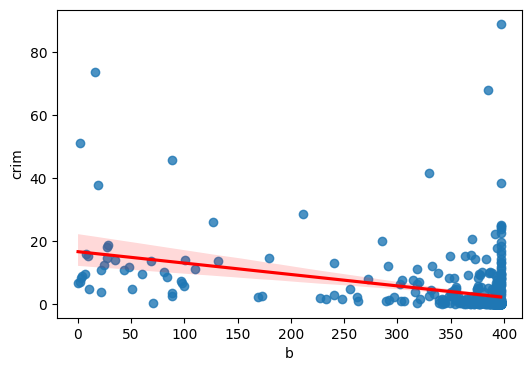

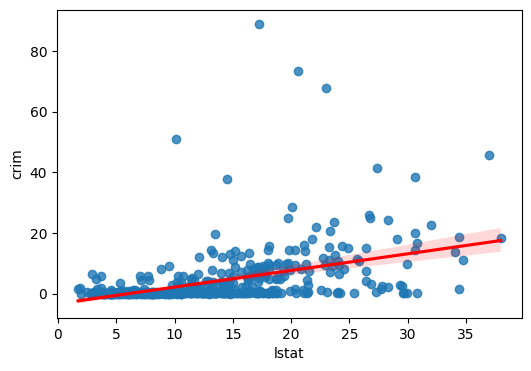

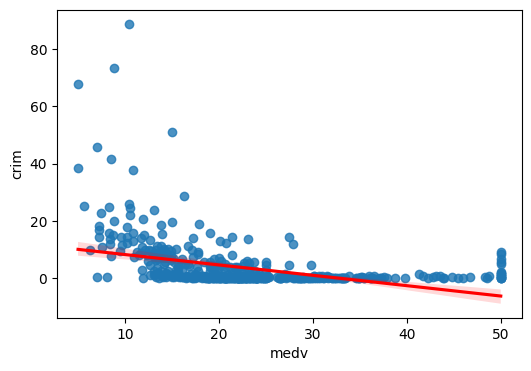

In [246]:

for features in predictors:
 fig , ax = plt.subplots(figsize=(6,4))
 sns.regplot(x=x[features],y=y,line_kws={'color':'red'})

# (B)

In [247]:
model_multiple = sm.OLS(y,x)
result_multiple = model_multiple.fit()
result_multiple.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   crim   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     31.47
Date:                Tue, 09 Sep 2025   Prob (F-statistic):           1.57e-56
Time:                        06:20:56   Log-Likelihood:                -1653.3
No. Observations:                 506   AIC:                             3335.
Df Residuals:                     492   BIC:                             3394.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.0332      7.235      2.354      0.019       2.818      31.248
zn             0.0449      0.019      2.394      0.017       0.008       0.082
indus         -0.0639      0.083     -0.766      0.444      -0.228       0.100
chas          -0.7491      1.180     -0.635      0.526      -3.068       1.570
nox          -10.3135      5.276     -1.955      0.051     -20.679       0.052
rm             0.4301      0.613      0.702      0.483      -0.774       1.634
age            0.0015      0.018      0.081      0.935      -0.034       0.037
dis           -0.9872      0.282     -3.503      0.001      -1.541      -0.433
rad            0.5882      0.088      6.680      0.000       0.415       0.761
tax           -0.0038      0.005     -0.733      0.464      -0.014       0.006
ptratio       -0.2711      0.186     -1.454      0.147      -0.637       0.095
b             -0.0075      0.004     -2.052      0.041      -0.015      -0.000
lstat          0.1262      0.076      1.667      0.096      -0.023       0.275
medv          -0.1989      0.061     -3.287      0.001      -0.318      -0.080
==============================================================================
Omnibus:                      666.613   Durbin-Watson:                   1.519
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            84887.625
Skew:                           6.617   Prob(JB):                         0.00
Kurtosis:                      65.058   Cond. No.                     1.58e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.58e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Chas** and **Age** are statistically Insignificant 

# (C)

In [248]:
univariate_coeff

[[3.6135235573122526],
 [0.0013784196642051124],
 [0.3753696473731186],
 [1.8516702857142855],
 [7.546748949265659],
 [0.534824116795819],
 [0.060625303419488755],
 [0.3638458707351144],
 [0.4870148660428756],
 [0.01188847601752518],
 [0.20875010818542042],
 [0.0072827563012095075],
 [0.3490763020398621],
 [0.08573045904108435]]

In [249]:
scaler = []
for item in univariate_coeff:
    scaler.append(item[0])

In [250]:
result_multiple.params.values

array([ 1.70332275e+01,  4.48552147e-02, -6.38548236e-02, -7.49133611e-01,
       -1.03135349e+01,  4.30130506e-01,  1.45164344e-03, -9.87175726e-01,
        5.88208591e-01, -3.78001638e-03, -2.71080558e-01, -7.53750489e-03,
        1.26211376e-01, -1.98886821e-01])

In [311]:
coefficient_d1f = pd.DataFrame({'Features':predictors,'Multi_Coefficients':result_multiple.params.values})
coefficient_d2f = pd.DataFrame({'Features':predictors,'Univariate_Coefficients':scaler})
coefficient_df = pd.merge(coefficient_d1f,coefficient_d2f)
coefficient_df

,Features,Multi_Coefficients,Univariate_Coefficients
0,const,17.033228,3.613524
1,zn,0.044855,0.001378
2,indus,-0.063855,0.375370
3,chas,-0.749134,1.851670
4,nox,-10.313535,7.546749
5,rm,0.430131,0.534824
6,age,0.001452,0.060625
7,dis,-0.987176,0.363846
8,rad,0.588209,0.487015
9,tax,-0.003780,0.011888


<Axes: xlabel='Univariate_Coefficients', ylabel='Multi_Coefficients'>

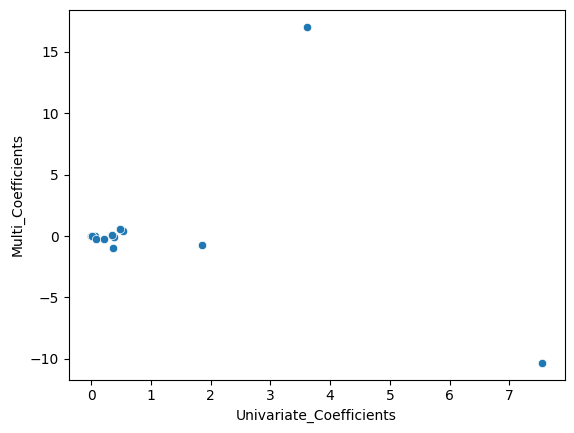

In [255]:
sns.scatterplot(x=coefficient_df['Univariate_Coefficients'],y=coefficient_df['Multi_Coefficients'],data=coefficient_df)

# (D)

In [277]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3)

In [312]:
for features in x.columns:
   x_poly = poly.fit_transform(x[[features]])
   y = df['crim']

   result = sm.OLS(y,x_poly).fit()
   print(f'for {features}')
   if result.pvalues.iloc[2] < 0.05:
    print('x^2 is Significant')
   else:
    print('x^2 is not Significant')
   if result.pvalues.iloc[3] < 0.05:
     print('x^3 is Significant')
   else:
     print('x^3 is not Significant')
   print(50*'-')


for const
x^2 is Significant
x^3 is Significant
--------------------------------------------------
for zn
x^2 is not Significant
x^3 is not Significant
--------------------------------------------------
for indus
x^2 is Significant
x^3 is Significant
--------------------------------------------------
for chas
x^2 is not Significant
x^3 is not Significant
--------------------------------------------------
for nox
x^2 is Significant
x^3 is Significant
--------------------------------------------------
for rm
x^2 is not Significant
x^3 is not Significant
--------------------------------------------------
for age
x^2 is Significant
x^3 is Significant
--------------------------------------------------
for dis
x^2 is Significant
x^3 is Significant
--------------------------------------------------
for rad
x^2 is not Significant
x^3 is not Significant
--------------------------------------------------
for tax
x^2 is not Significant
x^3 is not Significant
--------------------------------------